In [120]:
import pandas as pd

# Assuming the processed logs are stored in a CSV file
file_path = 'git_log_processed.csv'
processed_logs_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
processed_logs_df.head()

,hash,release,message,timestamp,author,change_type
0,ee1d06c8fa1f0a6bf2e6ffb189c15266bbbd1d76,(tag: 19.0.0),release: cut the v19.0.0-rc.0 release,2024-10-30 19:59:28+00:00,Alex Rickabaugh,release
1,48eac2320d66bca2b07d29f65b15636f4abadb50,(tag: 18.2.10),release: cut the v18.2.10 release,2024-10-30 19:03:32+00:00,Alex Rickabaugh,release
2,dcd16b43f31177a269317f7764ef38559b14fd66,(tag: 18.2.10),refactor(migrations): Make the explicit standa...,2024-10-29 22:04:20+00:00,Matthieu Riegler,refactor
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix
4,d504452e2f193d3b494a0b2944cddb028c0a2231,(tag: 18.2.10),fix(migrations): properly replace imports acro...,2024-10-29 17:07:01+00:00,Pawel Kozlowski,fix


In [121]:
#show only commits with "revert" inside of the commit message
revert_commits = processed_logs_df[processed_logs_df['message'].str.contains('revert', case=False)]
revert_commits.head()


,hash,release,message,timestamp,author,change_type
3,69dce38e778cb4c15aa06347031765a84e3ac6a5,(tag: 18.2.10),Revert fix(compiler): transform pseudo selecto...,2024-10-29 21:47:17+00:00,Matthieu Riegler,fix
51,1f4533807ebd4a130c5d174531179c4640dade47,(tag: 18.2.9),"Revert ""fix(forms): fix FormRecord type infere...",2024-10-22 20:41:03+00:00,Andrew Kushnir,fix
52,79d9be3e6309daafb86106cf78220bc027c61c41,(tag: 18.2.9),"Revert ""feat(forms): add ability to clear a Fo...",2024-10-22 20:40:54+00:00,Andrew Kushnir,feat
53,a5b0394313beda397b0c58a2897dc27678eefb57,(tag: 18.2.9),"Revert ""test(forms): add unit test (#50750)"" (...",2024-10-22 20:40:42+00:00,Andrew Kushnir,test
54,888657a12eca19d3a575ca25214ae6608bb9883a,(tag: 18.2.9),"Revert ""refactor(migrations): support parallel...",2024-10-22 19:01:57+00:00,Andrew Kushnir,refactor


In [122]:
#empty dataframe to store the reverted commits

pre_rev_com = pd.DataFrame(columns=['hash', 'release', 'message', 'timestamp', 'author', 'change_type'])

# Convert the 'timestamp' column to datetime format
processed_logs_df['timestamp'] = pd.to_datetime(processed_logs_df['timestamp'])

for index, row in revert_commits.iterrows():
    # #loop that loops 4 times
    # for i in range(4):
    #     pre_rev_com = pre_rev_com.append(processed_logs_df.loc[index+i])
    # Get the timestamp of the current revert commit
    revert_timestamp = row['timestamp']
    
    # Filter commits that happened up to 2 days before the current revert commit
    mask = (processed_logs_df['timestamp'] < revert_timestamp) & (processed_logs_df['timestamp'] >= (pd.to_datetime(revert_timestamp) - pd.Timedelta(days=5)))
    commits_to_append = processed_logs_df[mask]

    #if commits_to_append contains in message "revert" then dont append 
    if commits_to_append[commits_to_append['message'].str.contains('revert', case=False)].empty:
        pre_rev_com = pre_rev_com.append(commits_to_append, ignore_index=True)
    else:
        #get index of revrt commit inside of commits_to_append
        index_revert = commits_to_append[commits_to_append['message'].str.contains('revert', case=False)].index[0]
        #append all commits before revert commit    
        pre_rev_com = pre_rev_com.append(commits_to_append.loc[:index_revert-1], ignore_index=True)


#remove all but feat 
pre_rev_com = pre_rev_com[pre_rev_com['change_type'] == 'feat']



pre_rev_com.head()

C:\Users\hanch\AppData\Local\Temp\ipykernel_14872\2342718588.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre_rev_com = pre_rev_com.append(commits_to_append, ignore_index=True)
C:\Users\hanch\AppData\Local\Temp\ipykernel_14872\2342718588.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre_rev_com = pre_rev_com.append(commits_to_append.loc[:index_revert-1], ignore_index=True)


,hash,release,message,timestamp,author,change_type
32,2bfc64daf1cad9be8099759e8de7a361555ad5d1,(tag: 18.2.9),feat(migrations): expose output as function mi...,2024-10-22 10:13:38+00:00,Pawel Kozlowski,feat
33,ab25a192ba664863ad68d224b9b2df78da22769a,(tag: 18.2.9),feat(core): allow running output migration on ...,2024-10-22 10:12:17+00:00,Pawel Kozlowski,feat
57,6342befff8ee491f37e8912cccb0099bbbf01042,(tag: 18.2.9),feat(language-service): support migrating full...,2024-10-18 13:28:15+00:00,Paul Gschwendtner,feat
62,dff4de0f75741bc629462bb8da833b876c754453,(tag: 18.2.9),feat(migrations): add a combined migration for...,2024-10-18 08:39:59+00:00,Kristiyan Kostadinov,feat
74,e6e5d29e830a0a74d7677d5f2345f29391064853,(tag: 18.2.3),feat(core): initial version of the output migr...,2024-08-29 09:57:42+00:00,Pawel Kozlowski,feat


In [123]:
#show count of author inside of the pre_rev_com dataframe
pre_rev_com['author'].value_counts()


Alex Rickabaugh           64
Joey Perrott              50
Paul Gschwendtner         48
Kristiyan Kostadinov      35
Andrew Scott              35
                          ..
LASLEDJ                    1
cexbrayat                  1
Peter Johan Salomonsen     1
deebloo                    1
Victor Savkin              1
Name: author, Length: 112, dtype: int64

In [124]:
#show percentage wise to each author how many of theirs commits were reverted
authors = pre_rev_com['author'].value_counts()
authors = authors.reset_index()
authors.columns = ['author', 'reverted_commits']

# Get total commits for each author and reset the index
total_commits = processed_logs_df['author'].value_counts().reset_index()
total_commits.columns = ['author', 'total_commits']

# Merge the dataframes on the 'author' column
authors = authors.merge(total_commits, on='author')

# Calculate the percentage of reverted commits
authors['percentage'] = (authors['reverted_commits'] / authors['total_commits']) * 100

# order by total_commits
authors = authors.sort_values(by='total_commits', ascending=False)

# show only authors with more then 2 commits
authors = authors[authors['total_commits'] <= 2 ]

# how many authors with total comits 1 have percentage of 100%
# authors[authors['percentage'] == 100]

# order from highest percentage
authors = authors.sort_values(by='percentage', ascending=False)

authors.head(40)




,author,reverted_commits,total_commits,percentage
66,INFRAGISTICS\tiliev,1,1,100.0
95,Payam Shahidi,1,1,100.0
68,Sergey Shevchenko,1,1,100.0
69,Xander Garbett,1,1,100.0
65,Marcus Krahl,1,1,100.0
75,mrmeku,1,1,100.0
64,Julie Ralph,1,1,100.0
63,Panuruj Khambanonda (PK),1,1,100.0
81,Xin Gao,1,1,100.0
84,Devashish Sarmah,1,1,100.0


In [125]:
#what are change_types count before revert
pre_rev_com['change_type'].value_counts()


feat    793
Name: change_type, dtype: int64

In [126]:
# check who usually reverts the commits
revert_authors = revert_commits['author'].value_counts()

revert_authors

Andrew Scott             61
Alex Rickabaugh          55
Matias Niemel├ñ          43
Jessica Janiuk           41
Andrew Kushnir           41
atscott                  37
Mi┼íko Hevery            32
Victor Berchet           24
Jason Aden               23
Kara Erickson            23
Chuck Jazdzewski         21
Dylan Hunn               21
Misko Hevery             20
Igor Minar               17
Pete Bacon Darwin        15
Joey Perrott             13
Pawel Kozlowski          13
Tobias Bosch             10
Kristiyan Kostadinov      9
Greg Magolan              8
Alex Eagle                8
Wagner Maciel             6
George Kalpakas           6
Paul Gschwendtner         6
Alan Agius                6
Peter Bacon Darwin        5
Kapunahele Wong           3
Matthieu Riegler          3
Filipe Silva              2
Hans Larsen               2
mgechev                   2
Adam                      2
AleksanderBodurri         2
Doug Parker               2
Celilsemi Sam Erkiner     1
Georgios Kalpakas   

In [127]:
#check who is reverted the most
reverte = pre_rev_com['author'].value_counts()
reverte

Alex Rickabaugh           64
Joey Perrott              50
Paul Gschwendtner         48
Kristiyan Kostadinov      35
Andrew Scott              35
                          ..
LASLEDJ                    1
cexbrayat                  1
Peter Johan Salomonsen     1
deebloo                    1
Victor Savkin              1
Name: author, Length: 112, dtype: int64

In [128]:
# Filter revert_commits for rows where the author is "Andrew Scott"
andrew_scott_reverts = revert_commits[revert_commits['author'] == 'Andrew Scott']

# Initialize an empty dataframe to store the results
reverted_by_all = pd.DataFrame(columns=['reverted_author', 'count', 'reverter'])

# Loop through each revert commit
for index, row in revert_commits.iterrows():
    # Get the timestamp of the current revert commit
    revert_timestamp = row['timestamp']
    reverter = row['author']
    
    # Filter commits that happened up to 2 days before the current revert commit
    mask = (processed_logs_df['timestamp'] < revert_timestamp) & (processed_logs_df['timestamp'] >= (pd.to_datetime(revert_timestamp) - pd.Timedelta(days=2)))
    commits_to_append = processed_logs_df[mask]
    
    # Count the number of commits for each author
    author_counts = commits_to_append['author'].value_counts().reset_index()
    author_counts.columns = ['reverted_author', 'count']
    author_counts['reverter'] = reverter
    
    # Append the counts to the result dataframe
    reverted_by_all = pd.concat([reverted_by_all, author_counts])

# Group by reverted_author and reverter, and sum the counts
reverted_by_all = reverted_by_all.groupby(['reverted_author', 'reverter']).sum().reset_index()

# Order by count
reverted_by_all = reverted_by_all.sort_values(by='count', ascending=False)

# Display the result
reverted_by_all







,reverted_author,reverter,count
210,Andrew Scott,Andrew Scott,287
1700,atscott,atscott,254
1229,Paul Gschwendtner,Jessica Janiuk,212
1307,Pete Bacon Darwin,Pete Bacon Darwin,174
1219,Paul Gschwendtner,Andrew Scott,157
...,...,...,...
417,Dario Braun,Celilsemi Sam Erkiner,1
415,Daniil Gorbunov,Matias Niemel├ñ,1
1301,Pete Bacon Darwin,Kristiyan Kostadinov,1
410,Daniel Sogl,Mi┼íko Hevery,1


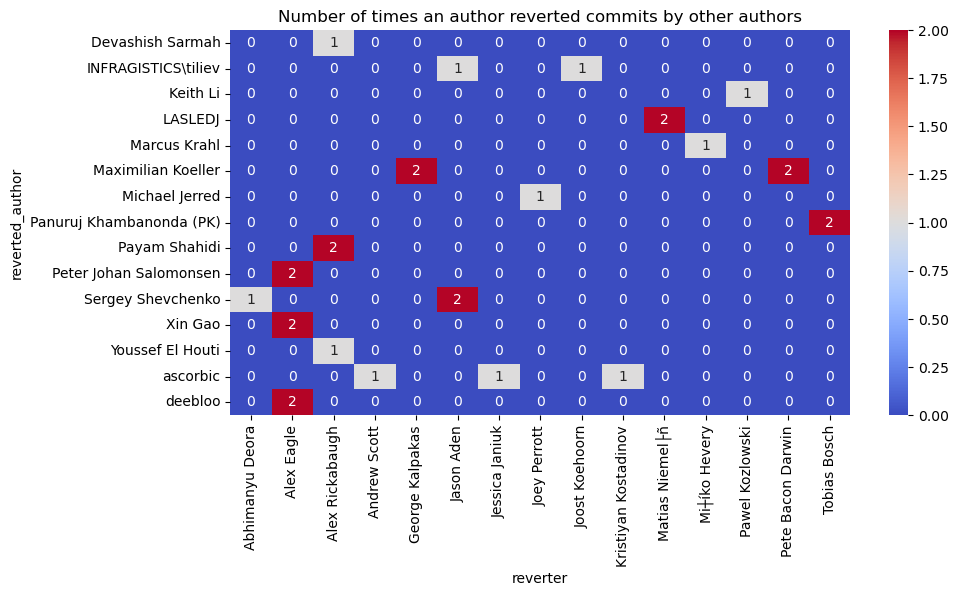

In [129]:
# try to make it visual so i can see better the corolation between the authors do only top 3
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the top 3 authors
top_3_authors = authors.head(20)

# Filter the reverted_by_all dataframe for the top 3 authors

reverted_by_all_top_3 = reverted_by_all[reverted_by_all['reverted_author'].isin(top_3_authors['author'])]

# Create a pivot table

pivot_table = reverted_by_all_top_3.pivot(index='reverted_author', columns='reverter', values='count')

# Fill NaN values with 0

pivot_table = pivot_table.fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Number of times an author reverted commits by other authors')
plt.show()




## 2nd part

In [130]:
import pandas as pd

# Load the dataset
file_path = 'git_log_processed.csv'
processed_logs_df = pd.read_csv(file_path)

#change inside processed_logs_df to revert that has revert inside of the message
revert_commits = processed_logs_df[processed_logs_df['message'].str.contains('revert', case=False)]
# change change_type to revert
revert_commits['change_type'] = 'revert'

#in processed_logs_df switch commit to revert if its inside of revert_commits

processed_logs_df.loc[revert_commits.index, 'change_type'] = 'revert'

# Calculate the frequency of each change_type per author
user_action_counts = processed_logs_df.groupby(['author', 'change_type']).size().unstack(fill_value=0)

# remove users with less then 100 commits
user_action_counts = user_action_counts[user_action_counts.sum(axis=1) > 50]

print(user_action_counts)


change_type        Not Found  build  chore  ci  docs  feat  fix  perf  \
author                                                                  
Alan                       0      7      0   3    17     0   17     0   
Alan Agius                 0    116      0  55   146    34  122     9   
AleksanderBodurri          0     24      0   9    19    71   78     5   
Alex Eagle                 0    128      0  31    25    11   45     0   
Alex Rickabaugh            0     30      0   8   100   142  272    13   
...                      ...    ...    ...  ..   ...   ...  ...   ...   
cexbrayat                  0      1      0   0    34     3   53     0   
crisbeto                   0     11      0   0     4     8   65    16   
dario-piotrowicz           0      2      0   0   110     3   24     0   
mgechev                    1     22      0  11    78    36   85     7   
renovate[bot]              0    105      0   0     0     0    0     0   

change_type        refactor  release  revert  styl

C:\Users\hanch\AppData\Local\Temp\ipykernel_14872\425718578.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revert_commits['change_type'] = 'revert'


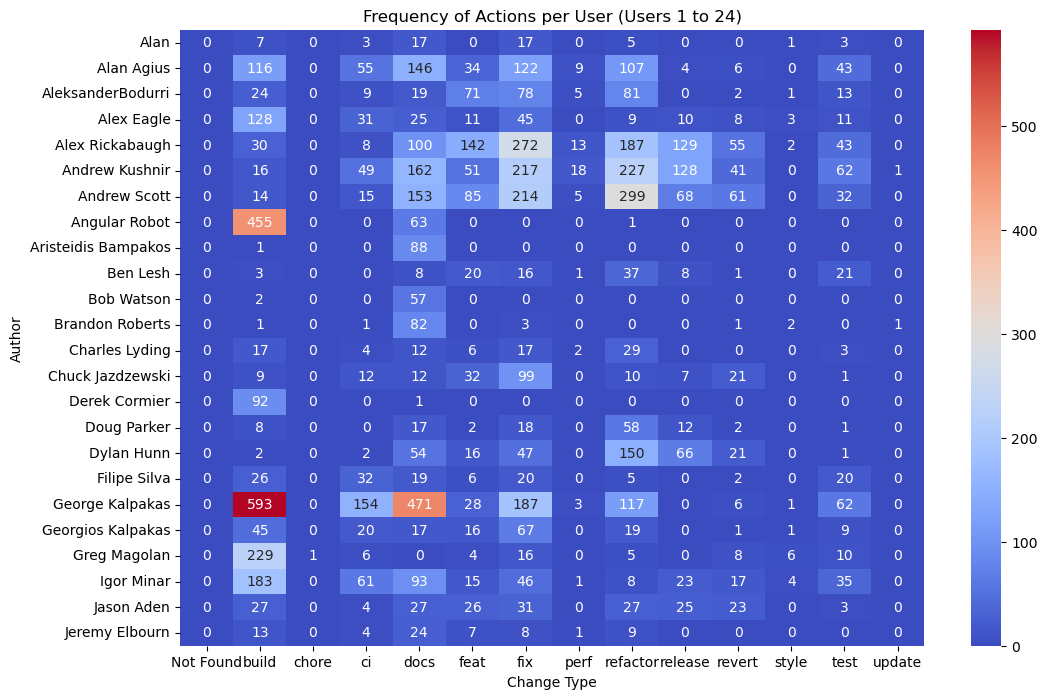

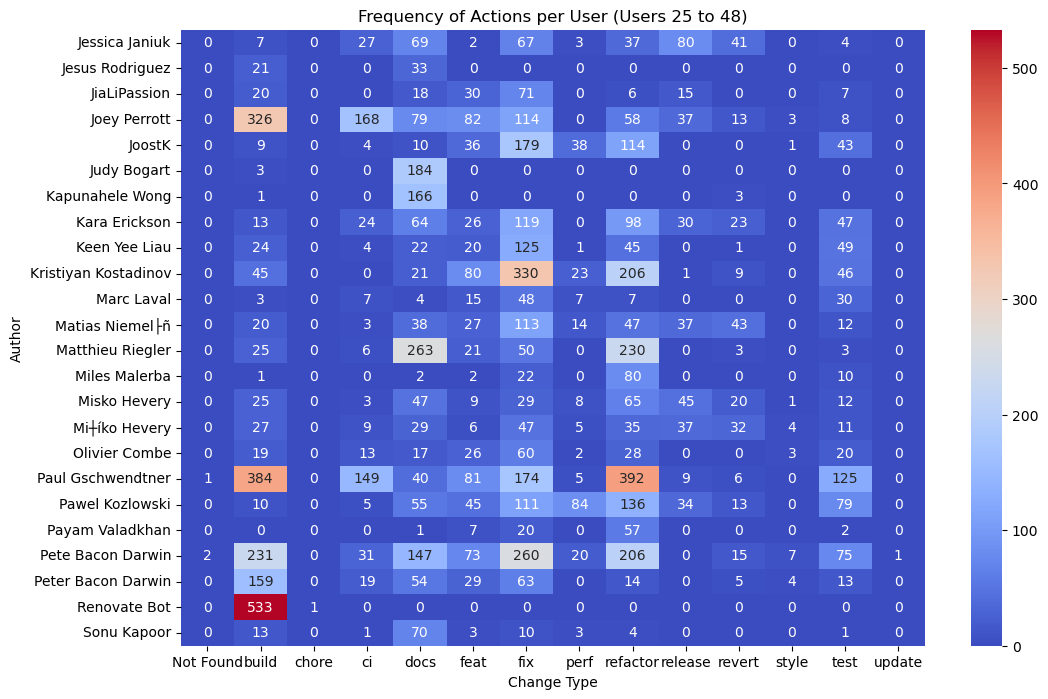

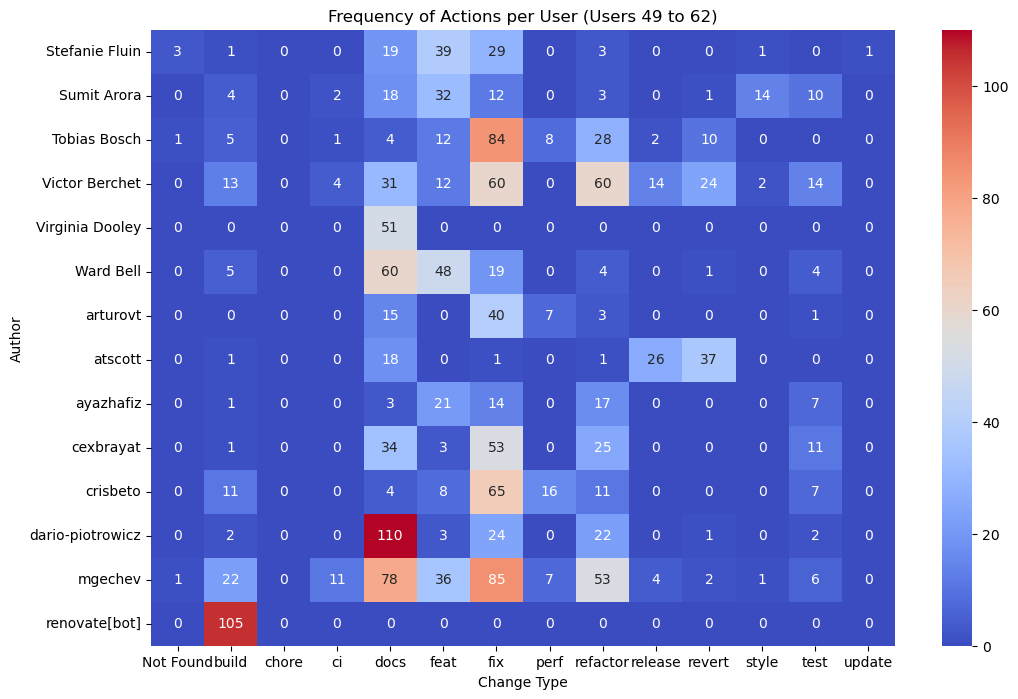

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of users per heatmap
chunk_size = 24
# Calculate the number of chunks
num_chunks = (len(user_action_counts) + chunk_size - 1) // chunk_size

# Loop through the chunks
for i in range(num_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(user_action_counts))  # Ensure the range doesn't exceed the DataFrame size
    user_action_counts_subset = user_action_counts.iloc[start:end]

    # Plot the heatmap
    plt.figure(figsize=(12, 8))  # Adjust the size for clarity
    sns.heatmap(user_action_counts_subset, annot=True, cmap="coolwarm", fmt="d")
    plt.title(f"Frequency of Actions per User (Users {start + 1} to {end})")
    plt.ylabel("Author")
    plt.xlabel("Change Type")
    plt.show()


c:\Users\hanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


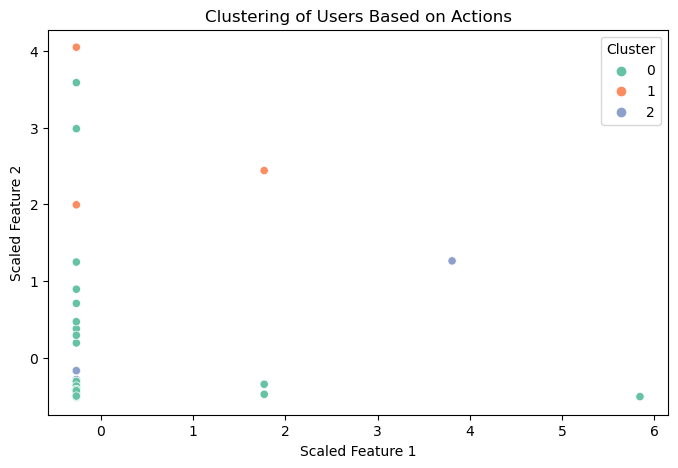

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data for clustering
scaler = StandardScaler()
user_action_counts_scaled = scaler.fit_transform(user_action_counts)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=2)  # Adjust clusters as needed
user_action_counts['Cluster'] = kmeans.fit_predict(user_action_counts_scaled)



# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=user_action_counts_scaled[:, 0], 
    y=user_action_counts_scaled[:, 1], 
    hue=user_action_counts['Cluster'], 
    palette="Set2", 
    legend="full"
)
plt.title("Clustering of Users Based on Actions")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()


In [133]:
# Separate the users into different DataFrames based on their cluster assignment
clustered_users = {}

# Iterate over each unique cluster and create a DataFrame for it
for cluster_label in user_action_counts['Cluster'].unique():
    clustered_users[cluster_label] = user_action_counts[user_action_counts['Cluster'] == cluster_label]
    #add total ammount of commits per user
    clustered_users[cluster_label]['total_commits'] = clustered_users[cluster_label].sum(axis=1)
    
    print(f"Cluster {cluster_label}:")
    display(clustered_users[cluster_label])  # Display the DataFrame for the current cluster


Cluster 0:


C:\Users\hanch\AppData\Local\Temp\ipykernel_14872\3932607471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_users[cluster_label]['total_commits'] = clustered_users[cluster_label].sum(axis=1)


change_type,Not Found,build,chore,ci,docs,feat,fix,perf,refactor,release,revert,style,test,update,Cluster,total_commits
author,,,,,,,,,,,,,,,,
Alan,0,7,0,3,17,0,17,0,5,0,0,1,3,0,0,53
Alan Agius,0,116,0,55,146,34,122,9,107,4,6,0,43,0,0,642
AleksanderBodurri,0,24,0,9,19,71,78,5,81,0,2,1,13,0,0,303
Alex Eagle,0,128,0,31,25,11,45,0,9,10,8,3,11,0,0,281
Angular Robot,0,455,0,0,63,0,0,0,1,0,0,0,0,0,0,519
Aristeidis Bampakos,0,1,0,0,88,0,0,0,0,0,0,0,0,0,0,89
Ben Lesh,0,3,0,0,8,20,16,1,37,8,1,0,21,0,0,115
Bob Watson,0,2,0,0,57,0,0,0,0,0,0,0,0,0,0,59
Brandon Roberts,0,1,0,1,82,0,3,0,0,0,1,2,0,1,0,91


Cluster 2:


C:\Users\hanch\AppData\Local\Temp\ipykernel_14872\3932607471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_users[cluster_label]['total_commits'] = clustered_users[cluster_label].sum(axis=1)


change_type,Not Found,build,chore,ci,docs,feat,fix,perf,refactor,release,revert,style,test,update,Cluster,total_commits
author,,,,,,,,,,,,,,,,
Alex Rickabaugh,0,30,0,8,100,142,272,13,187,129,55,2,43,0,2,983
Andrew Kushnir,0,16,0,49,162,51,217,18,227,128,41,0,62,1,2,974
Andrew Scott,0,14,0,15,153,85,214,5,299,68,61,0,32,0,2,948
Kristiyan Kostadinov,0,45,0,0,21,80,330,23,206,1,9,0,46,0,2,763
Pawel Kozlowski,0,10,0,5,55,45,111,84,136,34,13,0,79,0,2,574
Pete Bacon Darwin,2,231,0,31,147,73,260,20,206,0,15,7,75,1,2,1070


Cluster 1:


C:\Users\hanch\AppData\Local\Temp\ipykernel_14872\3932607471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_users[cluster_label]['total_commits'] = clustered_users[cluster_label].sum(axis=1)


change_type,Not Found,build,chore,ci,docs,feat,fix,perf,refactor,release,revert,style,test,update,Cluster,total_commits
author,,,,,,,,,,,,,,,,
George Kalpakas,0,593,0,154,471,28,187,3,117,0,6,1,62,0,1,1623
Joey Perrott,0,326,0,168,79,82,114,0,58,37,13,3,8,0,1,889
Paul Gschwendtner,1,384,0,149,40,81,174,5,392,9,6,0,125,0,1,1367


In [137]:



cluster = user_action_counts['Cluster'].unique()

# cluster_df = user_action_counts[user_action_counts['Cluster'] == 0].drop('Cluster', axis=1)
# cluster_profile = cluster_df.sum(axis=0).sort_values(ascending=False)
# print(f"Cluster {0} Profile:")
# print(cluster_profile)
# print("\n")


cluster_df = user_action_counts[user_action_counts['Cluster'] == 1].drop('Cluster', axis=1)
cluster_profile = cluster_df.sum(axis=0).sort_values(ascending=False)
print(f"Cluster {1} Profile:")
print(cluster_profile)
print("\n")

cluster_df = user_action_counts[user_action_counts['Cluster'] == 2].drop('Cluster', axis=1)
cluster_profile = cluster_df.sum(axis=0).sort_values(ascending=False)
print(f"Cluster {2} Profile:")
print(cluster_profile)
print("\n")


Cluster 1 Profile:
change_type
build        1303
docs          590
refactor      567
fix           475
ci            471
test          195
feat          191
release        46
revert         25
perf            8
style           4
Not Found       1
chore           0
update          0
dtype: int64


Cluster 2 Profile:
change_type
fix          1404
refactor     1261
docs          638
feat          476
release       360
build         346
test          337
revert        194
perf          163
ci            108
style           9
Not Found       2
update          2
chore           0
dtype: int64




In [140]:
#show per cluster how many commits in total the cluster has and how many reverted commits and the percentage of reverted commits
for i in cluster:
    print(f"Cluster {i} total commits: {clustered_users[i]['total_commits'].sum()}")
    print(f"Cluster {i} total reverted commits: {clustered_users[i]['revert'].sum()}")
    print(f"Cluster {i} percentage of reverted commits: {(clustered_users[i]['revert'].sum() / clustered_users[i]['total_commits'].sum()) * 100:.2f}%")
    print("\n")



Cluster 0 total commits: 11237
Cluster 0 total reverted commits: 360
Cluster 0 percentage of reverted commits: 3.20%


Cluster 2 total commits: 5312
Cluster 2 total reverted commits: 194
Cluster 2 percentage of reverted commits: 3.65%


Cluster 1 total commits: 3879
Cluster 1 total reverted commits: 25
Cluster 1 percentage of reverted commits: 0.64%


